In [2]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import os
import shutil
import gzip
from six.moves import urllib

# CVDF mirror of http://yann.lecun.com/exdb/mnist/
DEFAULT_SOURCE_URL = 'https://storage.googleapis.com/cvdf-datasets/mnist/'

def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)[0]


def extract_images(f):
    """Extract the images into a 4D uint8 numpy array [index, y, x, depth].
    Args:
      f: A file object that can be passed into a gzip reader.
    Returns:
      data: A 4D uint8 numpy array [index, y, x, depth].
    Raises:
      ValueError: If the bytestream does not start with 2051.
    """
    print('Extracting', f.name)
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %(magic, f.name))
        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)
        buf = bytestream.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)
        return data


def dense_to_one_hot(labels_dense, num_classes):
    """Convert class labels from scalars to one-hot vectors."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot


def extract_labels(f, one_hot=False, num_classes=10):
    """Extract the labels into a 1D uint8 numpy array [index].
    Args:
      f: A file object that can be passed into a gzip reader.
      one_hot: Does one hot encoding for the result.
      num_classes: Number of classes for the one hot encoding.
    Returns:
      labels: a 1D uint8 numpy array.
    Raises:
      ValueError: If the bystream doesn't start with 2049.
    """
    print('Extracting', f.name)
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST label file: %s' %(magic, f.name))
        num_items = _read32(bytestream)
        buf = bytestream.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)
        if one_hot:
            return dense_to_one_hot(labels, num_classes)
        return labels


def maybe_download(filename, work_directory, source_url):
    """Download the data from source url, unless it's already here.
    Args:
          filename: string, name of the file in the directory.
          work_directory: string, path to working directory.
          source_url: url to download from if file doesn't exist.
    Returns:
          Path to resulting file.
    """
    os.path.exists
    if not os.path.exists(work_directory):
        os.makedirs(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath):
        temp_file_name, _ = urllib.request.urlretrieve(source_url, None)
        shutil.copy (temp_file_name, filepath)
        with open(filepath, 'rb') as f:
            f.seek(0, 2)
            size = f.tell()
            print('Successfully downloaded', filename, size, 'bytes.')
    return filepath


def read_MNIST_datasets(train_dir,
                   one_hot=False,
                   dtype=np.float32,
                   reshape=True,
                   validation_size=5000,
                   seed=None,
                   source_url=DEFAULT_SOURCE_URL):

    if not source_url:  # empty string check
        source_url = DEFAULT_SOURCE_URL

    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    local_file = maybe_download(TRAIN_IMAGES, train_dir,
                                   source_url + TRAIN_IMAGES)
    with open(local_file, 'rb') as f:
        train_images = extract_images(f)

    local_file = maybe_download(TRAIN_LABELS, train_dir,
                                   source_url + TRAIN_LABELS)
    with open(local_file, 'rb') as f:
        train_labels = extract_labels(f, one_hot=one_hot)

    local_file = maybe_download(TEST_IMAGES, train_dir,
                                   source_url + TEST_IMAGES)
    with open(local_file, 'rb') as f:
        test_images = extract_images(f)

    local_file = maybe_download(TEST_LABELS, train_dir,
                                   source_url + TEST_LABELS)
    with open(local_file, 'rb') as f:
        test_labels = extract_labels(f, one_hot=one_hot)

    if not 0 <= validation_size <= len(train_images):
        raise ValueError('Validation size should be between 0 and {}. Received: {}.'.format(len(train_images), validation_size))

    validation_images = train_images[:validation_size]
    validation_labels = train_labels[:validation_size]
    train_images = train_images[validation_size:]
    train_labels = train_labels[validation_size:]

    train = (train_images, train_labels)
    validation = (validation_images, validation_labels)
    test = (test_images, test_labels)

    return train, validation, test


def load_mnist(train_dir='MNIST-data'):
    return read_MNIST_datasets(train_dir)

In [ ]:
train, validation, test = load_mnist()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


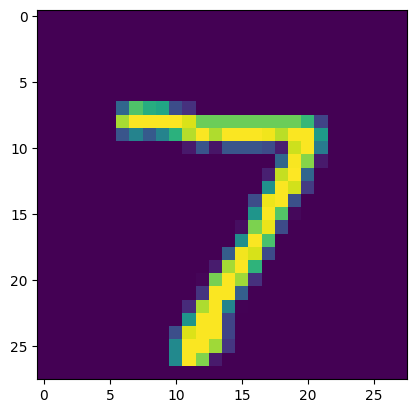

In [ ]:
plt.imshow(test[0][0])

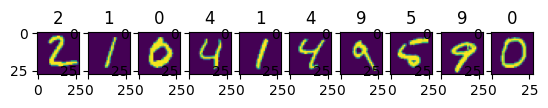

In [ ]:
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.imshow(test[0][i])
  plt.title(test[1][i])

In [ ]:
X, Y = train[0], train[1]

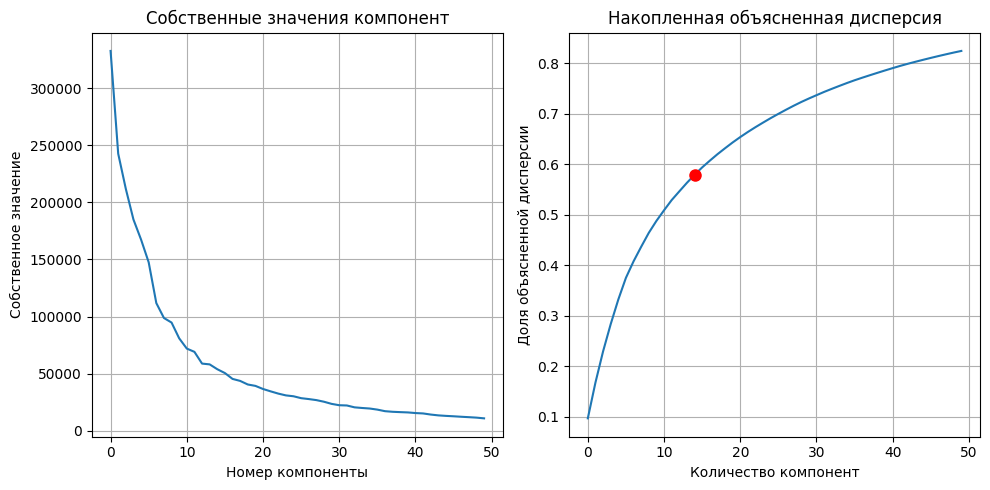

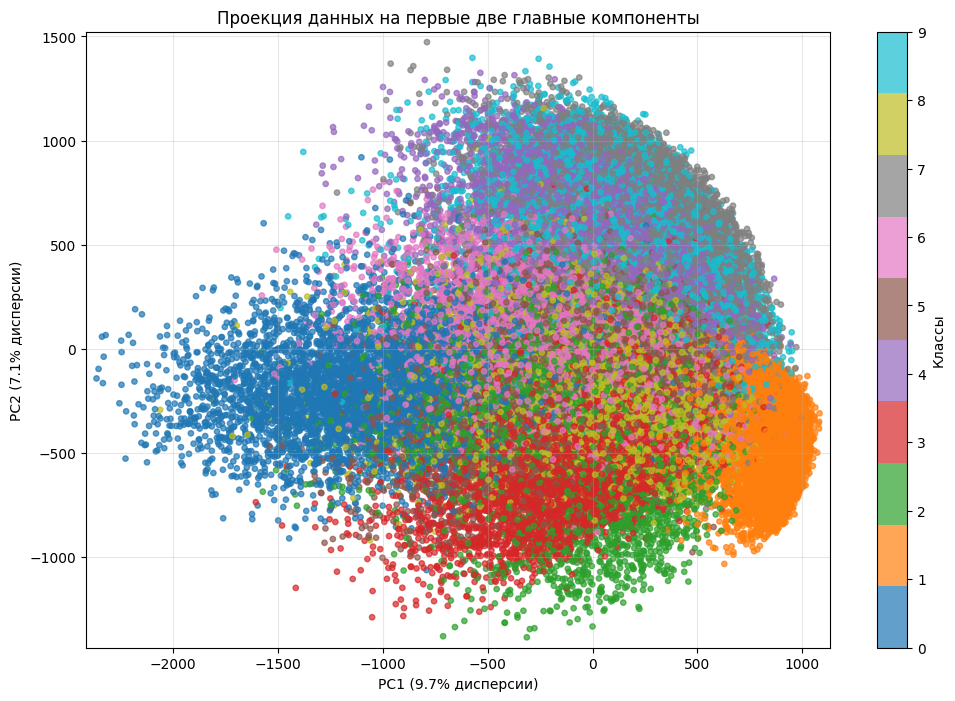

Объясненная дисперсия первой компонентой: 0.097
Объясненная дисперсия второй компонентой: 0.071
Суммарная объясненная дисперсия первыми 2 компонентами: 0.168
Диапазон PC1: [-2363.3, 1081.7]
Диапазон PC2: [-1385.4, 1472.9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = train[0], train[1]

class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.mean_ = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # Преобразуем данные
        X_reshaped = np.reshape(X, (X.shape[0], -1)).astype(np.float32)
        n_samples = X_reshaped.shape[0]

        # Центрируем данные
        self.mean_ = np.mean(X_reshaped, axis=0)
        X_centered = X_reshaped - self.mean_

        # Вычисляем ковариационную матрицу
        covariance_matrix = (X_centered.T @ X_centered) / (n_samples - 1)

        # Вычисляем собственные значения и векторы
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Сортируем по убыванию
        idx = eigenvalues.argsort()[::-1]
        self.components_ = eigenvectors[:, idx].T
        self.explained_variance_ = eigenvalues[idx]
        self.explained_variance_ratio_ = self.explained_variance_ / np.sum(self.explained_variance_)

        return self

    def transform(self, X):
        X_reshaped = np.reshape(X, (X.shape[0], -1)).astype(np.float32)
        X_centered = X_reshaped - self.mean_

        if self.n_components is not None:
            components_to_use = self.components_[:self.n_components]
        else:
            components_to_use = self.components_

        return X_centered @ components_to_use.T

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Применяем PCA
pca = my_PCA(n_components=15)
X_transformed = pca.fit_transform(X)

# График 1: Собственные значения (как на вашем первом скриншоте)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_[:50])  # Первые 50 компонент
plt.title('Собственные значения компонент')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.grid(True)

# График 2: Накопленная объясненная дисперсия
plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance[:50])
plt.plot(14, cumulative_variance[14], 'ro', markersize=8)
plt.title('Накопленная объясненная дисперсия')
plt.xlabel('Количество компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.grid(True)

plt.tight_layout()
plt.show()

# График 3: Проекция на первые две компоненты (как на вашем втором скриншоте)
X_projected = pca.transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1],
                     c=Y, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Классы')
plt.title('Проекция данных на первые две главные компоненты')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.grid(True, alpha=0.3)

# Добавляем информацию о масштабе
x1_min, x1_max = X_projected[:, 0].min(), X_projected[:, 0].max()
x2_min, x2_max = X_projected[:, 1].min(), X_projected[:, 1].max()
plt.xlim(x1_min - 50, x1_max + 50)
plt.ylim(x2_min - 50, x2_max + 50)

plt.show()





In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score


class my_kNN:
    def __init__(self, n_neighbors=5):
        # просто сохраняем k
        self.k = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        # приводим картинки к векторному виду
        self.X_train = X.reshape(X.shape[0], -1).astype(np.float32)
        self.y_train = y

    def predict(self, X):
        X = X.reshape(X.shape[0], -1).astype(np.float32)
        predictions = []

        for sample in X:
            # считаем расстояния от sample до всех точек обучающей выборки
            distances = np.linalg.norm(self.X_train - sample, axis=1)

            # выбираем индексы k ближайших соседей
            neighbors_idx = np.argsort(distances)[:self.k]

            # классы этих соседей
            neighbor_labels = self.y_train[neighbors_idx]

            # голосование: берём самый частый класс
            majority = np.bincount(neighbor_labels).argmax()
            predictions.append(majority)

        return np.array(predictions)



(train_images, train_labels), _, (test_images, test_labels) = load_mnist()

knn = my_kNN(n_neighbors=5)
knn.fit(train_images, train_labels)

# Тестируем только на части выборки
x_test = test_images[:500]
y_test = test_labels[:500]

y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Точность kNN (k=7): {acc:.4f}")


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Точность kNN (k=7): 0.9640
